In [7]:
# import libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import joblib

In [2]:
col_to_drop = ['PLAYER', 'CS']
data = pd.read_csv('../dataset/500hits.csv', encoding='latin-1')
data.drop(col_to_drop, axis=1, inplace=True)
data.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [3]:
X = data.drop('HOF', axis=1) # features
y = data['HOF'] # target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# create model
model = RandomForestClassifier()

# train model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [5]:
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Score: {score}')
print(f'Precision: {precision}')
print(f'Report: {report}')
print(f'Confusion Matrix: {conf_matrix}')

Accuracy: 0.8709677419354839
Score: 0.8709677419354839
Precision: 0.8518518518518519
Report:               precision    recall  f1-score   support

           0       0.88      0.94      0.91        62
           1       0.85      0.74      0.79        31

    accuracy                           0.87        93
   macro avg       0.87      0.84      0.85        93
weighted avg       0.87      0.87      0.87        93

Confusion Matrix: [[58  4]
 [ 8 23]]


In [8]:
# MI model
mi_features = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])

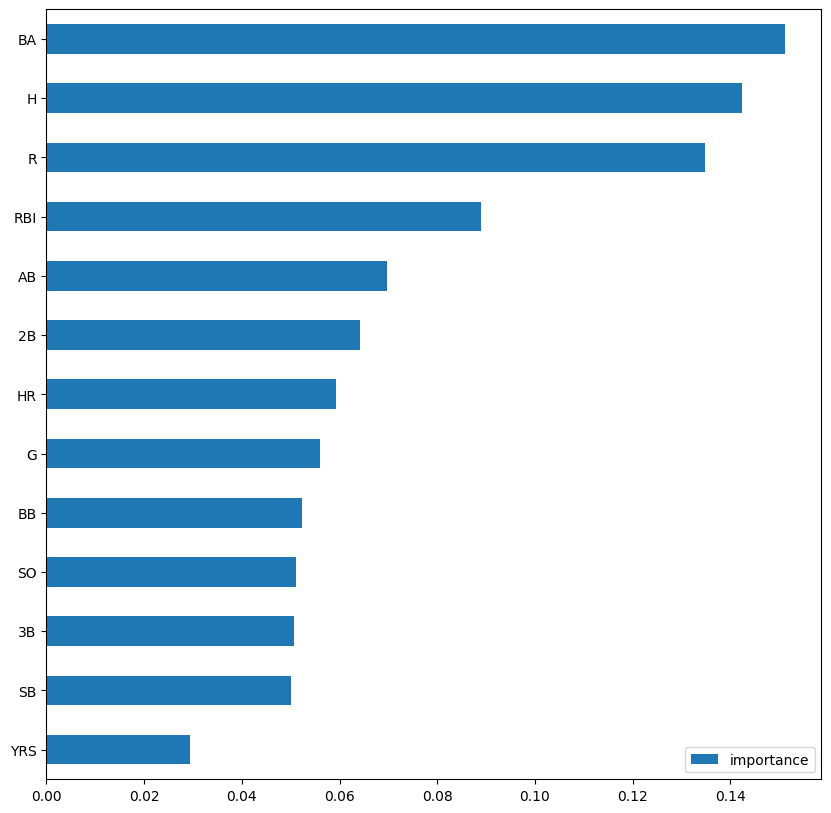

In [9]:
mi_features.sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(10, 10))
plt.show()

In [11]:
# improve model 

model = RandomForestClassifier(
    n_estimators=100, criterion='entropy', min_samples_split=10, max_depth=10, random_state=42, n_jobs=-1)

In [12]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
score = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Score: {score}')
print(f'Precision: {precision}')
print(f'Report: {report}')
print(f'Confusion Matrix: {conf_matrix}')

Accuracy: 0.8924731182795699
Score: 0.8924731182795699
Precision: 0.8620689655172413
Report:               precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.86      0.81      0.83        31

    accuracy                           0.89        93
   macro avg       0.88      0.87      0.88        93
weighted avg       0.89      0.89      0.89        93

Confusion Matrix: [[58  4]
 [ 6 25]]


In [ ]:
# save model
joblib.dump(model, '../models/random_forest_model.pkl')